In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import scipy.stats as stats
from datetime import datetime
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
fig_dpi      = 300
fig_typeface = 'Helvetica'
fig_family   = 'monospace'
fig_style    = 'normal'

In [2]:
Path = "../Data/"
rawPath = "CreditCardFraud.csv"
rawData = pd.read_csv(Path+rawPath, header = 0)
rawData.head(5)
rawData.shape

(786363, 29)

In [3]:
len(rawData.accountNumber.unique())

5000

In [4]:
naVariables = []
for col in rawData.columns:
    if len(rawData[col].dropna()) == 0:print(col); naVariables.append(col) 

echoBuffer
merchantCity
merchantState
merchantZip
posOnPremises
recurringAuthInd


In [5]:
duVariables = []
for col in rawData.columns:
    if len(rawData[col].unique()) == 1:print(col); duVariables.append(col) 

echoBuffer
merchantCity
merchantState
merchantZip
posOnPremises
recurringAuthInd


In [6]:
Data = rawData.drop(labels = naVariables + duVariables, axis = 1)
Data.shape
Data.head(2)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,2.0,...,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.0,False,False,False
1,737265056,737265056,5000.0,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,9.0,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,True,False,False


In [7]:
for col in Data.columns:
    print(col, ":", Data[col].dtype, len(Data[col].unique()), len(Data[col][Data[col].isna() == True]))

accountNumber : int64 5000 0
customerId : int64 5000 0
creditLimit : float64 10 0
availableMoney : float64 521862 0
transactionDateTime : object 776637 0
transactionAmount : float64 66038 0
merchantName : object 2490 0
acqCountry : object 5 4562
merchantCountryCode : object 5 724
posEntryMode : float64 6 4054
posConditionCode : float64 4 409
merchantCategoryCode : object 19 0
currentExpDate : object 165 0
accountOpenDate : object 1820 0
dateOfLastAddressChange : object 2184 0
cardCVV : int64 899 0
enteredCVV : int64 976 0
cardLast4Digits : int64 5245 0
transactionType : object 4 698
currentBalance : float64 487318 0
cardPresent : bool 2 0
expirationDateKeyInMatch : bool 2 0
isFraud : bool 2 0


In [8]:
duVariables = []
for i in range(len(Data.columns) - 1):
    for j in range(i+1, len(Data.columns)):
        col1 = Data.columns[i]
        col2 = Data.columns[j]
        if Data[col1].dtype == Data[col2].dtype:
            if len((Data[col1] == Data[col2]).unique()) == 1:
                if (Data[col1] == Data[col2]).unique()[0]:
                    print(col1, col2)
                    duVariables.append(col2)
Data = Data.drop(labels = duVariables, axis = 1)

accountNumber customerId


In [9]:
cols = ["acqCountry", "merchantCountryCode", "posEntryMode", "posConditionCode", "transactionType"]
for col in cols:
    m = Data[pd.isna(Data[col]) == True]
    mf = m[m.isFraud == True]
    if len(mf) == 0:
        print(col, "|", 0, "|", len(m),"|")
    else:
        print(col, "|", np.round(len(mf)/len(m),4),"|", len(m), "|")
print("Base","|", np.round(sum(Data.isFraud)/len(Data),4),"|", len(Data),"|")

acqCountry | 0.0327 | 4562 |
merchantCountryCode | 0.1133 | 724 |
posEntryMode | 0.0664 | 4054 |
posConditionCode | 0.0538 | 409 |
transactionType | 0.0201 | 698 |
Base | 0.0158 | 786363 |


In [10]:
# Drop outliers according to creditLimit, availableMoney, transactionAmount, currentBalance
outlierDrop = ["creditLimit", "availableMoney", "transactionAmount", "currentBalance","posEntryMode", "posConditionCode"]
# for col in outlierDrop:
#     Data = Data[np.abs(Data[col] - np.mean(Data[col])) < 3*np.std(Data[col])]

/var/folders/dy/y_4bw3nj3nl7cw3b482fcf_c0000gn/T/ipykernel_48168/3871011710.py:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


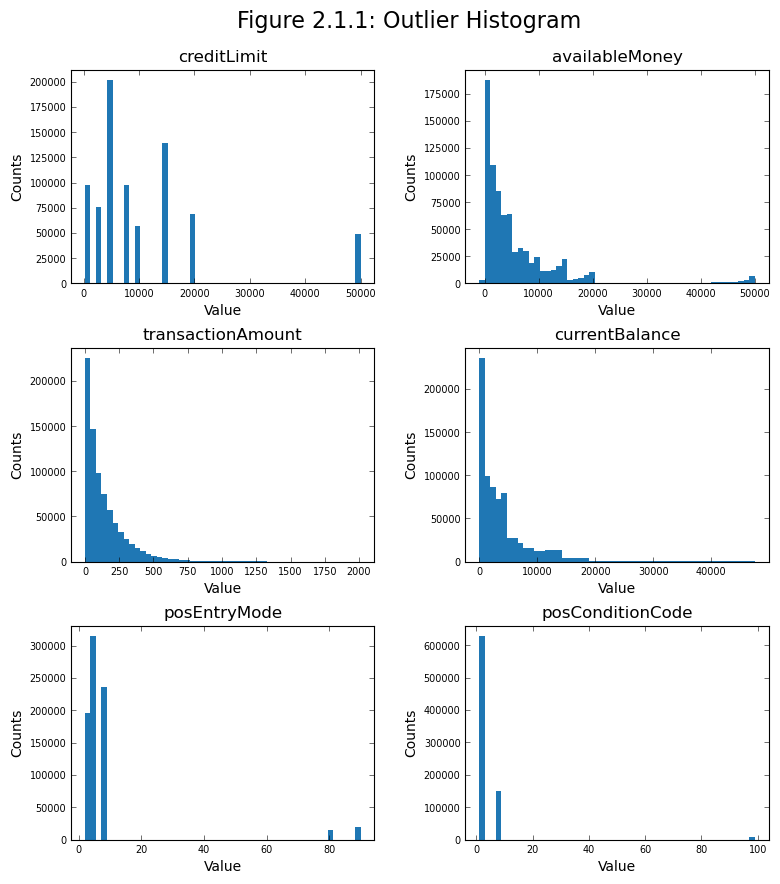

In [11]:
fig, axes = plt.subplots(nrows= 3, ncols=2, figsize=(9, 10),  gridspec_kw={'hspace': 0.3, 'wspace': 0.3})
fig.suptitle('Figure 2.1.1: Outlier Histogram', fontsize=16, y =0.94)
for ax, col in zip(axes.flatten(), outlierDrop):
    ax.hist(Data[col], bins=50)
    ax.set_title(col)

    ax.set_xlabel('Value')
    ax.set_ylabel('Counts')
    ax.tick_params(axis='both', which='both', labelsize='x-small', right=True, top=True, direction='in', width=.4)   
    
# axes[0].text(0.05, 0.95, "Figure 2.1.1", size=5, weight = 'bold',style=fig_style, family=fig_family, fontname=fig_typeface, transform=axes[0].transAxes)
# plt.savefig("../outputs/outlier.png", bbox_inches = "tight")
plt.tight_layout()
plt.show()

In [12]:
for col in outlierDrop:
    Data = Data[Data[col] >=0]
Data = Data[Data['posEntryMode'] <= 60]
Data = Data[Data['posConditionCode'] <= 60]
Data = Data[Data['currentBalance'] <= 20000]

In [13]:
Data.shape

(717306, 22)

In [14]:
cols = ["acqCountry", "merchantCountryCode", "posEntryMode", "posConditionCode", "transactionType"]
for col in cols:
    m = Data[pd.isna(Data[col]) == True]
    mf = m[m.isFraud == True]
    if len(mf) == 0:
        print(col, ":", 0, len(m))
    else:
        print(col, ":", np.round(len(mf)/len(m),4), len(m))
print("Base", np.round(sum(Data.isFraud)/len(Data),4))

acqCountry : 0.0328 4172
merchantCountryCode : 0.1131 663
posEntryMode : 0 0
posConditionCode : 0 0
transactionType : 0.02 649
Base 0.0152


In [15]:
717306 - len(Data.dropna(axis = 0))

4820

In [16]:
for col in Data.columns:
    print(col, ":", Data[col].dtype, len(Data[col].unique()), len(Data[col][Data[col].isna() == True]))

accountNumber : int64 4994 0
creditLimit : float64 10 0
availableMoney : float64 479639 0
transactionDateTime : object 709189 0
transactionAmount : float64 64573 0
merchantName : object 2488 0
acqCountry : object 5 4172
merchantCountryCode : object 5 663
posEntryMode : float64 3 0
posConditionCode : float64 2 0
merchantCategoryCode : object 19 0
currentExpDate : object 165 0
accountOpenDate : object 1817 0
dateOfLastAddressChange : object 2180 0
cardCVV : int64 899 0
enteredCVV : int64 974 0
cardLast4Digits : int64 5235 0
transactionType : object 4 649
currentBalance : float64 448007 0
cardPresent : bool 2 0
expirationDateKeyInMatch : bool 2 0
isFraud : bool 2 0


In [17]:
Data = Data.dropna(axis = 0)

In [18]:
Data["transactionDateTime"] = Data["transactionDateTime"].astype("datetime64")
Data["accountOpenDate"] = Data["accountOpenDate"].astype("datetime64")
Data["dateOfLastAddressChange"] = Data["dateOfLastAddressChange"].astype("datetime64")
Data["currentExpDate"] = Data["currentExpDate"].astype("datetime64")

In [19]:
Data["cardLast4Digits"] = [("{:>4}".format(s)).replace(" ", "0") for s in Data.cardLast4Digits]
Data["cardCVV"] = [("{:>3}".format(s)).replace(" ", "0") for s in Data.cardCVV]
Data["enteredCVV"] = [("{:>3}".format(s)).replace(" ", "0") for s in Data.enteredCVV]

In [20]:
Data["CVVMatched"] = (Data.cardCVV == Data.enteredCVV).astype("int")
sum(Data["CVVMatched"]) - len(Data)

-6399

In [21]:
Data[Data.isFraud == True]

,accountNumber,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,...,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,CVVMatched
971,114896048,15000.0,14113.96,2016-01-06 08:05:06,298.85,sears.com,US,US,9.0,1.0,...,2015-12-19,773,773,8915,PURCHASE,886.04,False,False,True,1
1072,114896048,15000.0,13702.47,2016-03-07 02:40:54,406.89,Planet Fitness #136615,US,US,9.0,1.0,...,2015-12-19,773,773,8915,PURCHASE,1297.53,False,False,True,1
1113,114896048,15000.0,8943.58,2016-04-09 15:14:04,439.31,oldnavy.com,US,US,9.0,1.0,...,2015-12-19,773,773,8915,PURCHASE,6056.42,False,False,True,1
1321,114896048,15000.0,5223.03,2016-08-24 01:24:35,266.09,sears.com,US,US,9.0,1.0,...,2016-06-10,773,773,8915,PURCHASE,9776.97,False,False,True,1
1345,114896048,15000.0,3094.15,2016-09-08 15:51:39,195.28,Uber,US,US,2.0,1.0,...,2016-06-10,773,773,8915,PURCHASE,11905.85,False,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785410,841351704,50000.0,40134.91,2016-10-11 19:44:57,246.65,Lyft,US,US,9.0,1.0,...,2015-12-17,651,651,7831,PURCHASE,9865.09,False,False,True,1
785713,207667444,7500.0,764.48,2016-06-14 12:03:12,393.43,Pizza Hut #288835,US,US,9.0,8.0,...,2011-12-12,235,235,9853,PURCHASE,6735.52,True,False,True,1
785888,428856030,250.0,61.94,2016-08-25 15:55:11,370.43,discount.com,US,US,9.0,1.0,...,2009-08-17,990,990,7660,PURCHASE,188.06,False,False,True,1
786054,657364505,20000.0,20000.00,2016-08-21 14:41:30,28.09,Next Day Online Services,US,US,9.0,8.0,...,2014-10-31,138,138,6163,PURCHASE,0.00,False,False,True,1


In [22]:
s = 1
("{:>3}".format(s)).replace(" ", "0")

'001'

In [23]:
len(Data[Data.isFraud == True])

10733

/var/folders/dy/y_4bw3nj3nl7cw3b482fcf_c0000gn/T/ipykernel_48168/1640950743.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "No Fraud": np.array([len(Data[Data["CVVMatched"] == 0][Data["isFraud"] == False])/len(Data[Data["CVVMatched"] == 0]),
/var/folders/dy/y_4bw3nj3nl7cw3b482fcf_c0000gn/T/ipykernel_48168/1640950743.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(Data[Data["CVVMatched"] == 1][Data["isFraud"] == False])/len(Data[Data["CVVMatched"] == 1])]),
/var/folders/dy/y_4bw3nj3nl7cw3b482fcf_c0000gn/T/ipykernel_48168/1640950743.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Fraud": np.array([len(Data[Data["CVVMatched"] == 0][Data["isFraud"] == True])/len(Data[Data["CVVMatched"] == 0]),
/var/folders/dy/y_4bw3nj3nl7cw3b482fcf_c0000gn/T/ipykernel_48168/1640950743.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(Data[Data["CVVMatch

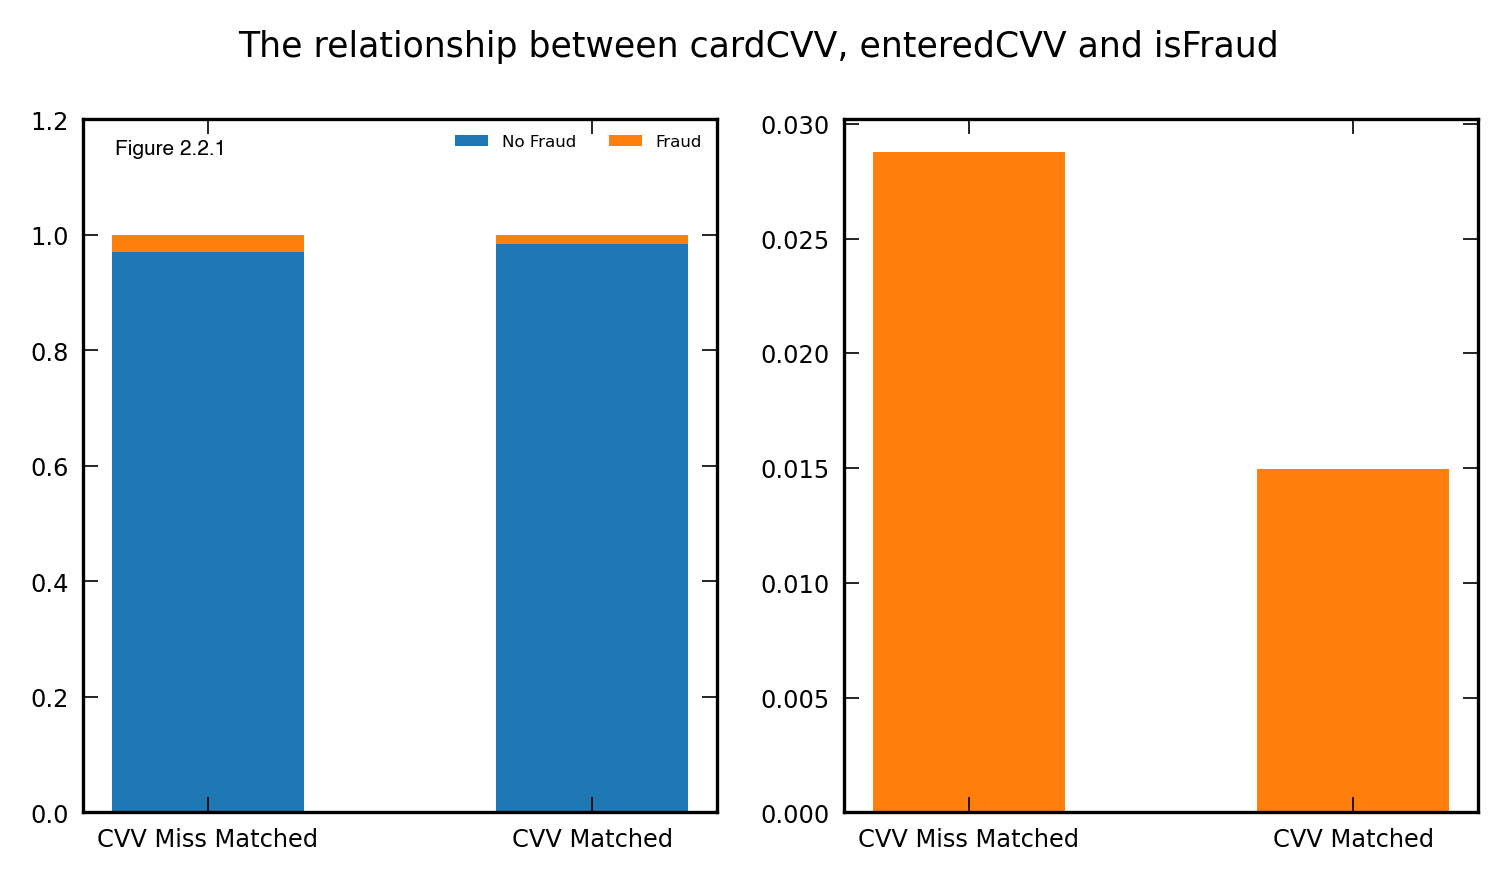

In [24]:
f = plt.figure(figsize=(6, 3), facecolor='white', dpi=300)
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

kinds = (
    "CVV Miss Matched",
    "CVV Matched"
)
weight_counts = {
    "No Fraud": np.array([len(Data[Data["CVVMatched"] == 0][Data["isFraud"] == False])/len(Data[Data["CVVMatched"] == 0]), 
                      len(Data[Data["CVVMatched"] == 1][Data["isFraud"] == False])/len(Data[Data["CVVMatched"] == 1])]),
    "Fraud": np.array([len(Data[Data["CVVMatched"] == 0][Data["isFraud"] == True])/len(Data[Data["CVVMatched"] == 0]), 
                      len(Data[Data["CVVMatched"] == 1][Data["isFraud"] == True])/len(Data[Data["CVVMatched"] == 1])])
}
width = 0.5

bottom = np.zeros(2)

for boolean, weight_count in weight_counts.items():
    p = ax1.bar(kinds, weight_count, width, label=boolean, bottom = bottom)
    bottom += weight_count
FraudD = Data[Data.isFraud == True]
FC = FraudD[FraudD["CVVMatched"] == 1]
FW = FraudD[FraudD["CVVMatched"] == 0]
ax2.bar(kinds, [len(FW)/len(Data[Data["CVVMatched"] == 0]), len(FC)/len(Data[Data["CVVMatched"] == 1])], width, color = "tab:orange")
f.suptitle("The relationship between cardCVV, enteredCVV and isFraud", size = "small")
ax1.tick_params(axis='both', which='both', labelsize='xx-small', right=True, top=True, direction='in', width=.4)   
ax2.tick_params(axis='both', which='both', labelsize='xx-small', right=True, top=True, direction='in', width=.4)   

ax1.text(0.05, 0.95, "Figure 2.2.1", size=5, weight = 'bold',style=fig_style, family=fig_family, fontname=fig_typeface, transform=ax1.transAxes)

ax1.set_ylim(0,1.2)
ax1.legend(loc = 1 ,fontsize = 4,markerscale = 2,ncol = 3,scatterpoints= 1,frameon = True,framealpha =0.).get_frame().set_linewidth(0.0)
# plt.savefig("../outputs/output1.png", bbox_inches = "tight")
plt.show()

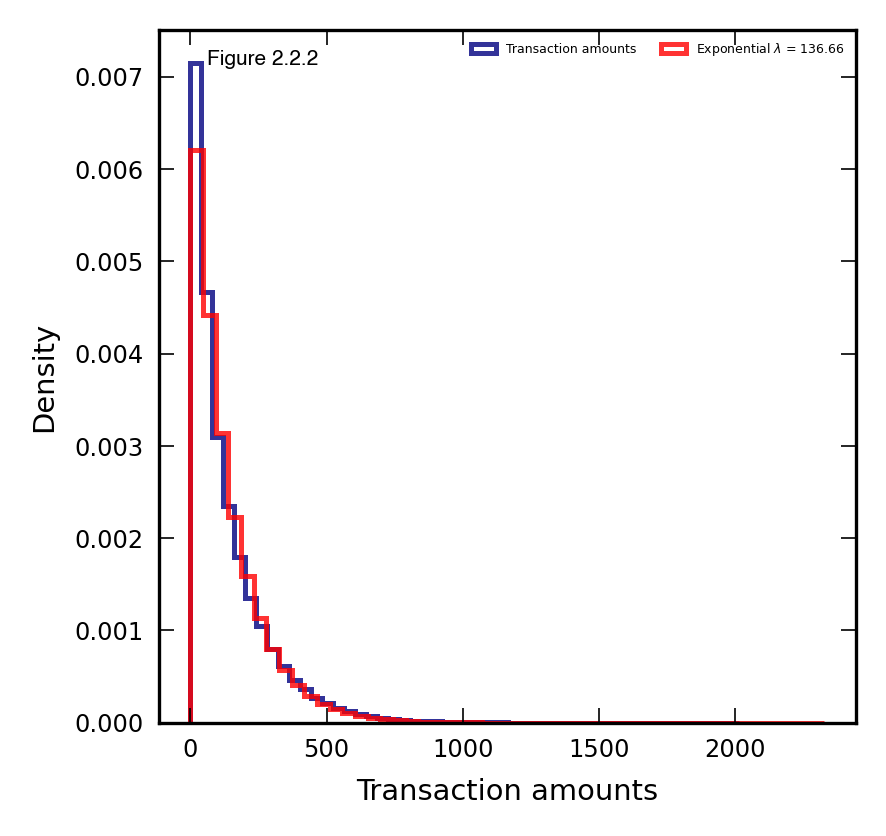

In [25]:
f, ax = plt.subplots(1, 1, figsize=(3, 3), facecolor='white', dpi=300, gridspec_kw={'hspace': 0., 'wspace': 0.})

ax.hist(Data.transactionAmount, density= 1, bins=50, histtype='step',lw= 1.2,color='navy', alpha=0.8, zorder = 0,label = "Transaction amounts")
ax.hist(np.random.exponential(scale = (np.mean(Data.transactionAmount)), size = int(1e7)), density = 1, bins = 50, histtype = 'step',
        lw = 1.2,color = "red", alpha = 0.8, zorder = 0,label = r"Exponential $\lambda$ = %.2f"%(np.mean(Data.transactionAmount)))

ax.tick_params(axis = 'both', which = 'both', labelsize = 'xx-small', right = True, top = True, direction = 'in', width = .4)   

ax.set_xlabel("Transaction amounts", size = 'x-small')   
ax.set_ylabel("Density", size = 'x-small')

ax.text(0.07, 0.95, "Figure 2.2.2", size=5, weight = 'bold',style=fig_style, family=fig_family, fontname=fig_typeface, transform=ax.transAxes)

ax.legend(loc = 1 ,fontsize = 3,markerscale = 2,ncol = 3,scatterpoints= 1,frameon = True,framealpha =0.).get_frame().set_linewidth(0.0)

plt.savefig("../outputs/output2.png", bbox_inches = "tight")  


/var/folders/dy/y_4bw3nj3nl7cw3b482fcf_c0000gn/T/ipykernel_48168/3693666452.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  weight2 = len(Data[Data[variable] == idx][Data["isFraud"] == True])/len(Data[Data[variable] == idx])
/var/folders/dy/y_4bw3nj3nl7cw3b482fcf_c0000gn/T/ipykernel_48168/3693666452.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  weight2 = len(Data[Data[variable] == idx][Data["isFraud"] == True])/len(Data[Data[variable] == idx])
/var/folders/dy/y_4bw3nj3nl7cw3b482fcf_c0000gn/T/ipykernel_48168/3693666452.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  weight2 = len(Data[Data[variable] == idx][Data["isFraud"] == True])/len(Data[Data[variable] == idx])
/var/folders/dy/y_4bw3nj3nl7cw3b482fcf_c0000gn/T/ipykernel_48168/3693666452.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  weight2 = len(Data[Data[variable] == idx][Data["isFra

Text(0.05, 0.95, 'Figure 2.2.3')

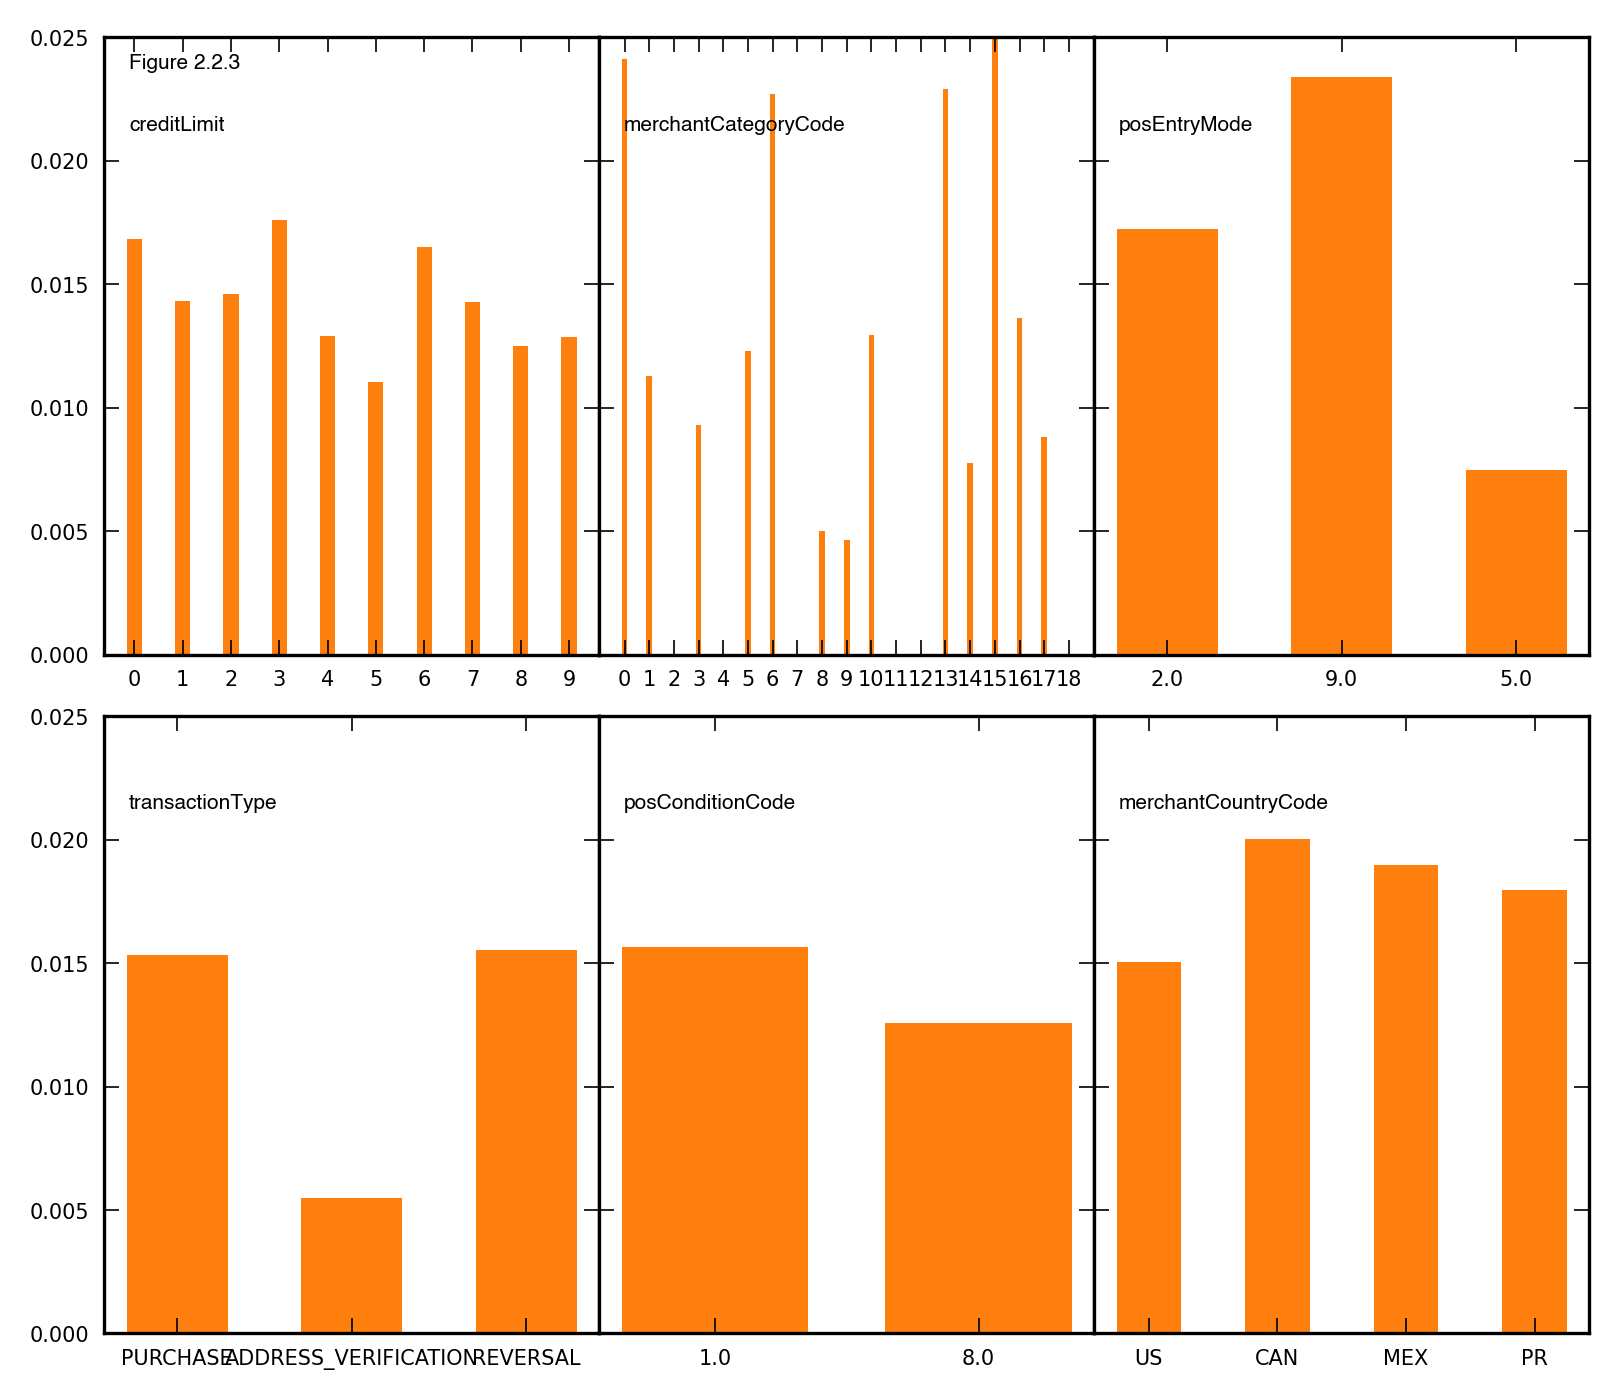

In [26]:
f = plt.subplots(figsize=(5, 4.8), dpi=300)
gs1 = gridspec.GridSpec(2, 1)
gs1.update(left=0.005, right=0.335, bottom=0.05, top=0.95, hspace=0.1, wspace=0.)
ax1 = plt.subplot(gs1[0])
ax4 = plt.subplot(gs1[1])


gs2 = gridspec.GridSpec(2, 1)
gs2.update(left=0.335, right=0.665, bottom=0.05, top=0.95, hspace=0.1, wspace=0.)
ax2 = plt.subplot(gs2[0])
ax5 = plt.subplot(gs2[1])

gs3 = gridspec.GridSpec(2, 1)
gs3.update(left=0.665, right=0.995, bottom=0.05, top=0.95, hspace=0.1, wspace=0.)
ax3 = plt.subplot(gs3[0])
ax6 = plt.subplot(gs3[1])

cVariables = ["creditLimit","merchantCategoryCode", "posEntryMode", "transactionType", "posConditionCode", "merchantCountryCode"]
for i in range(len(cVariables)):
    variable = cVariables[i]
    exec("ax = ax%d"%(i+1))    
    kinds = [str(_) for _ in Data[variable].unique()]
    if variable == "creditLimit":
        kinds = [str(i) for i in range(len(Data[variable].unique()))]
    elif variable == "merchantCategoryCode":
        kinds = [str(i) for i in range(len(Data[variable].unique()))]
    NF = []
    F = []
    for idx in Data[variable].unique():
#         weight1 = len(Data[Data[variable] == idx][Data["isFraud"] == False])/len(Data[Data[variable] == idx][Data["isFraud"] == False])
#         weight2 = len(Data[Data[variable] == idx][Data["isFraud"] == True])/len(Data[Data[variable] == idx][Data["isFraud"] == False])
        weight2 = len(Data[Data[variable] == idx][Data["isFraud"] == True])/len(Data[Data[variable] == idx])
#         NF.append(weight1)
        F.append(weight2)
#     NF = np.array(NF)
    F = np.array(F)
    weight_counts = {
#         "No Fraud": NF,
        "Fraud":F
    }
    width = 1/np.sqrt((len(kinds)))

    bottom = np.zeros(len(kinds))
    ax.text(0.05, 0.85, variable, size=5, weight = 'bold',style=fig_style, family=fig_family, fontname=fig_typeface, transform=ax.transAxes)
    
    for boolean, weight_count in weight_counts.items():
        p = ax.bar(kinds, weight_count, width, label=boolean, bottom = bottom, color = "tab:orange")
#         bottom += weight_count

#     ax.set_title("The relationship between cardCVV, enteredCVV and isFraud", size = "small")
    ax.tick_params(axis='both', which='both', labelsize=5, labelleft = False, right=True, top=True, direction='in', width=.4)

    ax.set_ylim(0,0.025)
ax1.tick_params(axis='both', which='both', labelsize=5, labelleft = True, right=True, top=True, direction='in', width=.4)
ax4.tick_params(axis='both', which='both', labelsize=5, labelleft = True, right=True, top=True, direction='in', width=.4)
    
# ax1.legend(loc = 1 ,fontsize = 3,markerscale = 2,ncol = 3,scatterpoints= 1,frameon = True,framealpha =0.).get_frame().set_linewidth(0.0)
ax1.text(0.05, 0.95, "Figure 2.2.3", size=5, weight = 'bold',style=fig_style, family=fig_family, fontname=fig_typeface, transform=ax1.transAxes)

# plt.savefig("../outputs/outputs3.png", bbox_inches = "tight")

In [27]:

# predictors = cVariables[1:5]

# X_train, X_test, y_train, y_test = model_selection.train_test_split(Data[predictors], Data.isFraud, 
#                                                      test_size = 0.3, random_state = 465)
# # 预设各参数的不同选项值
# max_depth = np.arange(30)
# min_samples_split = np.arange(30)
# min_samples_leaf = np.arange(30)
# parameters = {'max_depth':max_depth, 'min_samples_split':min_samples_split, 'min_samples_leaf':min_samples_leaf}

# grid_dtcateg = GridSearchCV(estimator = tree.DecisionTreeRegressor(), param_grid = parameters, cv=10)

# grid_dtcateg.fit(X_train, y_train)

# grid_dtcateg.best_params_

In [28]:
Data.merchantCategoryCode.unique()

array(['rideshare', 'entertainment', 'mobileapps', 'fastfood',
       'food_delivery', 'auto', 'online_retail', 'gym', 'health',
       'personal care', 'food', 'fuel', 'online_subscriptions',
       'online_gifts', 'hotels', 'airline', 'furniture', 'subscriptions',
       'cable/phone'], dtype=object)

In [29]:
Dic_value = {}
for idx1 in Data.merchantCategoryCode.unique():
    idx1Values = []
    for idx2 in Data.transactionType.unique():
        FV = Data[Data.merchantCategoryCode == idx1]
        FV = FV[FV.transactionType == idx2]
        if len(FV) == 0:
            value = 0
        else:
            value = len(FV[FV.isFraud == True])/len(FV)
#         FV = Data[Data.merchantCategoryCode == idx1][Data.isFraud == True]
#         value = len(FV[FV.transactionType == idx2])/len(Data[Data.isFraud == True])
        idx1Values.append(np.round(value,3))
    idx1Values.append(sum(idx1Values))
    Dic_value[idx1] = idx1Values


In [30]:
result = pd.DataFrame(Dic_value)

In [31]:
result["sum"] = [np.sum(result.iloc[i]) for i in range(result.shape[0])]
# result.set_index(((Data.transactionType.unique()).tolist() + ["sum"]))
for idx in (result.T).index:
    line = np.round((result.T).loc[idx], 3)
    print("|", idx, "|", line[0], "|", line[1], "|", line[2], "|", line[3], "|")

| rideshare | 0.025 | 0.006 | 0.025 | 0.056 |
| entertainment | 0.011 | 0.01 | 0.012 | 0.033 |
| mobileapps | 0.0 | 0.0 | 0.0 | 0.0 |
| fastfood | 0.009 | 0.007 | 0.007 | 0.023 |
| food_delivery | 0.0 | 0.0 | 0.0 | 0.0 |
| auto | 0.013 | 0.004 | 0.009 | 0.026 |
| online_retail | 0.023 | 0.004 | 0.021 | 0.048 |
| gym | 0.0 | 0.0 | 0.0 | 0.0 |
| health | 0.005 | 0.002 | 0.004 | 0.011 |
| personal care | 0.005 | 0.004 | 0.006 | 0.015 |
| food | 0.013 | 0.006 | 0.012 | 0.031 |
| fuel | 0.0 | 0.0 | 0.0 | 0.0 |
| online_subscriptions | 0.0 | 0.0 | 0.0 | 0.0 |
| online_gifts | 0.024 | 0.002 | 0.022 | 0.048 |
| hotels | 0.008 | 0.0 | 0.006 | 0.014 |
| airline | 0.034 | 0.02 | 0.055 | 0.109 |
| furniture | 0.014 | 0.01 | 0.005 | 0.029 |
| subscriptions | 0.009 | 0.003 | 0.006 | 0.018 |
| cable/phone | 0.0 | 0.0 | 0.0 | 0.0 |
| sum | 0.193 | 0.078 | 0.19 | 0.461 |


In [32]:
labels = ["mobileapps", "food_delivery", "gym", "online_subscriptions", "fuel", "cable/phone","sum"]
result = result.drop(labels, axis = 1)
result

,rideshare,entertainment,fastfood,auto,online_retail,health,personal care,food,online_gifts,hotels,airline,furniture,subscriptions
0,0.025,0.011,0.009,0.013,0.023,0.005,0.005,0.013,0.024,0.008,0.034,0.014,0.009
1,0.006,0.010,0.007,0.004,0.004,0.002,0.004,0.006,0.002,0.000,0.020,0.010,0.003
2,0.025,0.012,0.007,0.009,0.021,0.004,0.006,0.012,0.022,0.006,0.055,0.005,0.006
3,0.056,0.033,0.023,0.026,0.048,0.011,0.015,0.031,0.048,0.014,0.109,0.029,0.018


(0.0, 0.15)

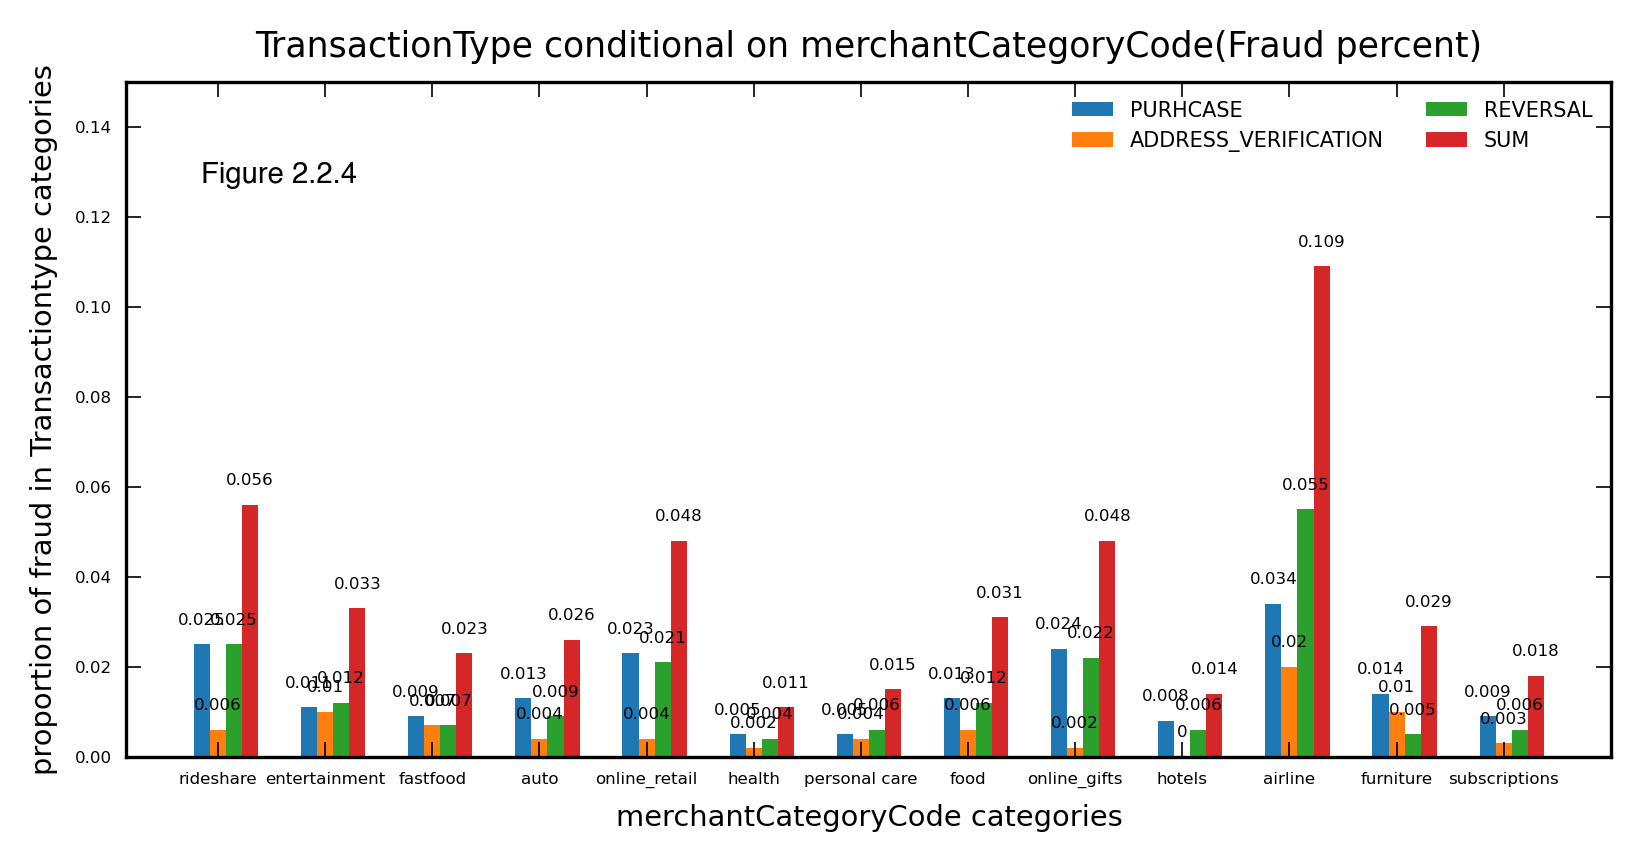

In [33]:
f = plt.subplots(figsize=(5, 2.5), dpi=300)
gs1 = gridspec.GridSpec(1, 1)
gs1.update(left=0.005, right=0.995, bottom=0.05, top=0.95, hspace=0.1, wspace=0.)
ax1 = plt.subplot(gs1[0])

species = np.array(result.columns)
penguin_means = {
    'PURHCASE': np.array(result.iloc[0]),
    'ADDRESS_VERIFICATION': np.array(result.iloc[1]),
    'REVERSAL': np.array(result.iloc[2]),
    'SUM':np.array(result.iloc[3]),
}

x = np.linspace(0,20, len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0


for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax1.bar(x + offset, measurement, width, label=attribute)
    ax1.bar_label(rects, padding=4, size = 4)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('proportion of fraud in Transactiontype categories', size = "x-small")
ax1.set_xlabel('merchantCategoryCode categories', size = "x-small")
ax1.set_title('TransactionType conditional on merchantCategoryCode(Fraud percent)', size = "small")
ax1.set_xticks(x + width, species)
ax1.tick_params(axis='both', which='both', labelsize=4, labelleft = True, right=True, top=True, direction='in', width=.4)
ax1.legend(loc = 1 ,fontsize = 5,markerscale = 2,ncol = 2,scatterpoints= 1,frameon = True,framealpha =0.).get_frame().set_linewidth(0.0)
ax1.text(0.05, 0.85, "Figure 2.2.4", size=7, weight = 'bold',style=fig_style, family=fig_family, fontname=fig_typeface, transform=ax1.transAxes)
ax1.set_ylim(0, 0.15)

# plt.savefig("../outputs/output4.png", bbox_inches = "tight")


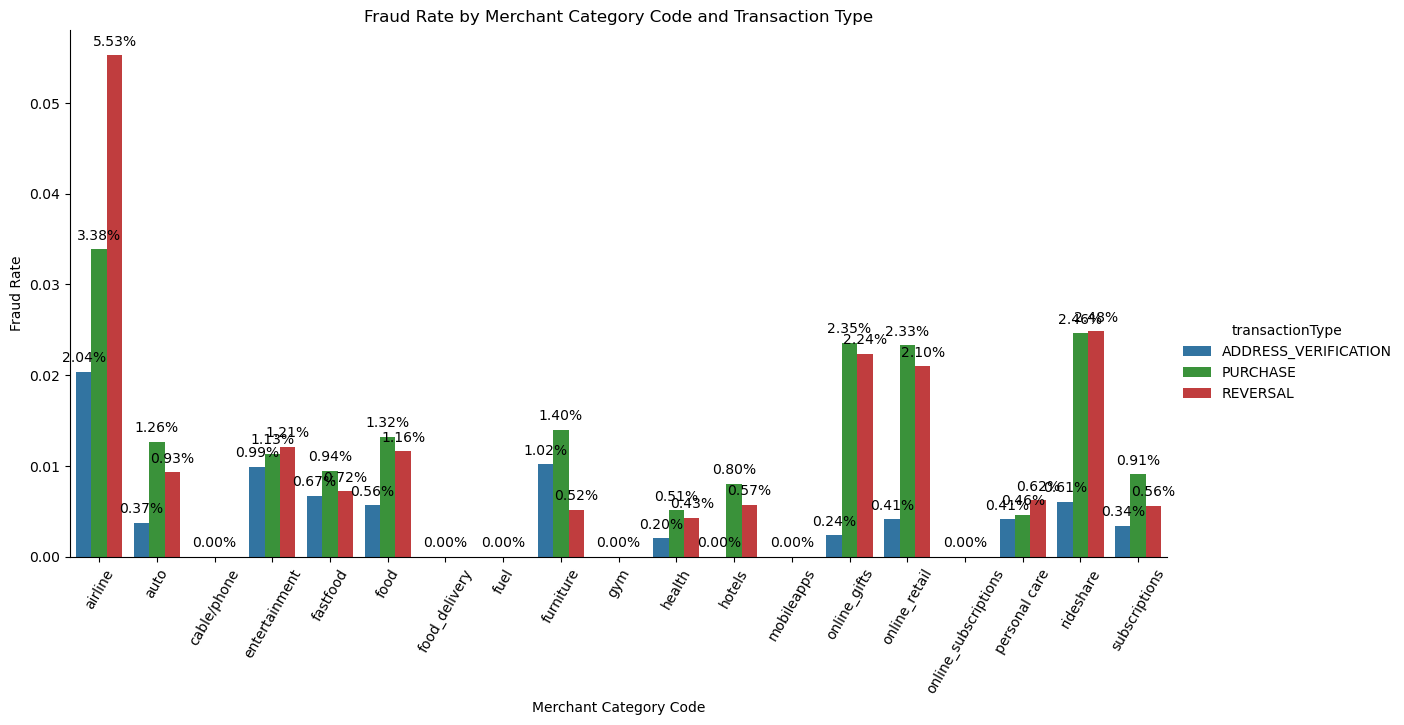

In [34]:
grouped = Data.groupby(['merchantCategoryCode', 'transactionType'])['isFraud'].mean().reset_index()
ax = sns.catplot(x="merchantCategoryCode", y="isFraud", hue="transactionType", data=grouped, kind="bar", height=6, aspect=2, palette=['tab:blue', 'tab:green', 'tab:red'])
ax.set(xlabel='Merchant Category Code', ylabel='Fraud Rate', title='Fraud Rate by Merchant Category Code and Transaction Type')
plt.xticks(rotation=60)
for p in ax.ax.patches:
    ax.ax.annotate(format(p.get_height(), '.2%'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

In [35]:
grouped.describe()

,isFraud
count,45.000000
mean,0.010262
std,0.010685
min,0.000000
25%,0.004098
50%,0.006681
75%,0.012630
max,0.055263


Text(0, 0.5, 'transactionAmount')

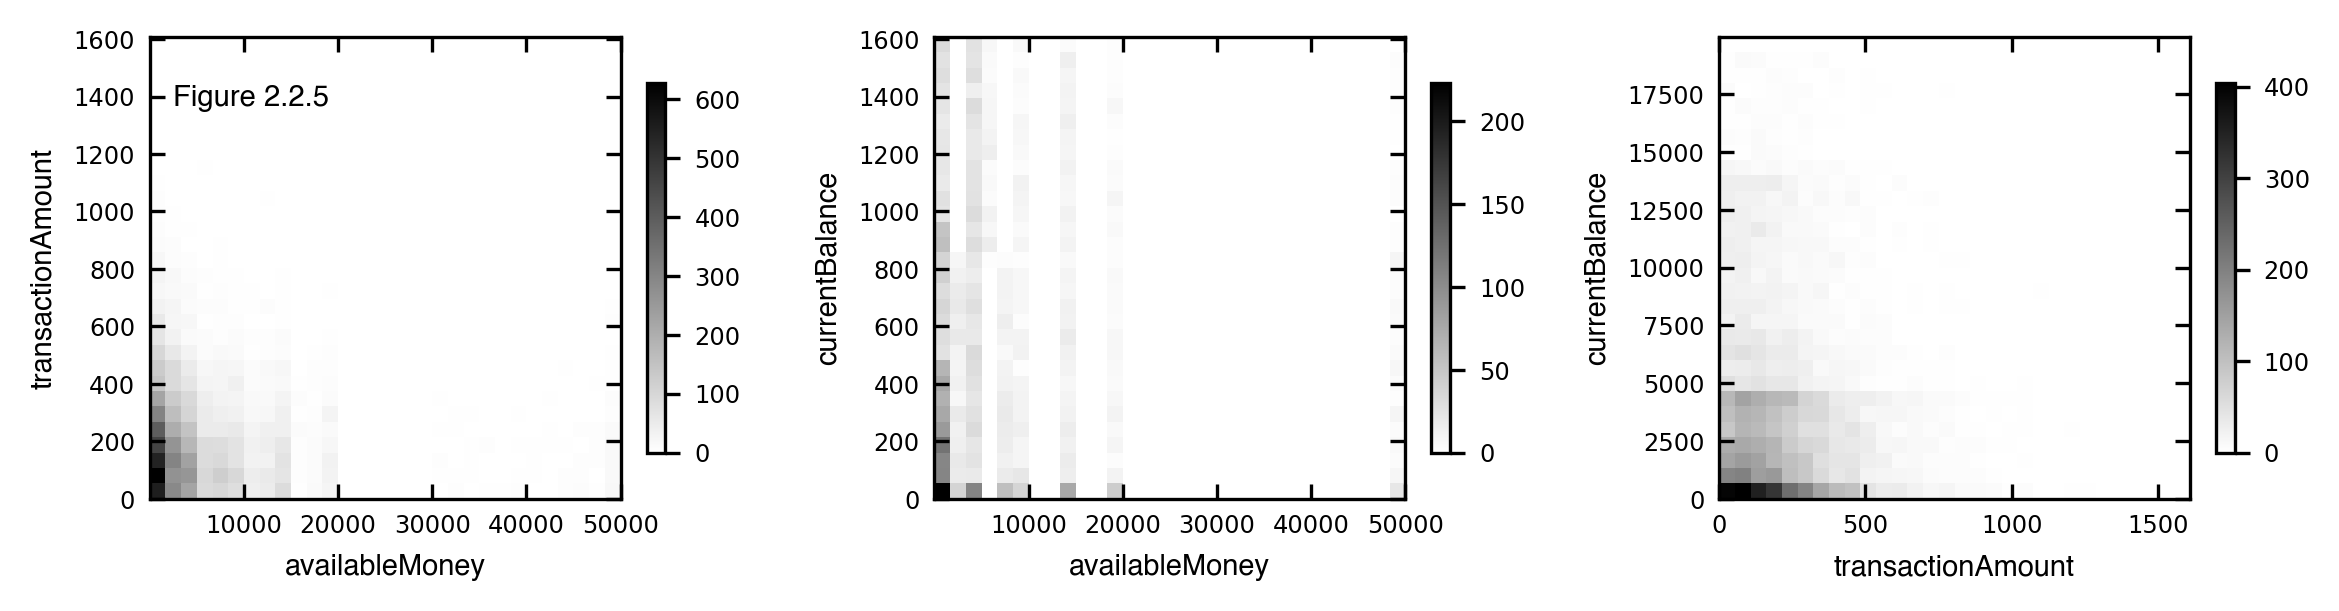

In [36]:
FraudData = Data[Data.isFraud == True]
# --------------------------------------------------------------------------------------------------
box1 = [np.min(FraudData.availableMoney), np.max(FraudData.availableMoney), np.min(FraudData.transactionAmount), np.max(FraudData.transactionAmount)]
box2 = [np.min(FraudData.availableMoney), np.max(FraudData.availableMoney), np.min(FraudData.currentBalance), np.max(FraudData.currentBalance)]
box3 = [np.min(FraudData.transactionAmount), np.max(FraudData.transactionAmount), np.min(FraudData.currentBalance), np.max(FraudData.currentBalance)]


f = plt.figure(dpi = 300, facecolor = 'white',figsize = (9,2))
plt.subplots_adjust(wspace=0.5)

ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

h = ax1.hist2d(FraudData['availableMoney'], FraudData['transactionAmount'],
               bins=30, range=([box1[0],box1[1]],[box1[2],box1[3]]), cmap='binary', cmin=0, )

cob = f.colorbar(h[3], ax=ax1, orientation='vertical', fraction=0.05, shrink=0.8)
cob.ax.tick_params(axis='both', labelsize='xx-small')

h = ax2.hist2d(FraudData['availableMoney'], FraudData['currentBalance'],
               bins=30, range=([box1[0],box1[1]],[box1[2],box1[3]]), cmap='binary', cmin=0, )

cob = f.colorbar(h[3], ax=ax2, orientation='vertical', fraction=0.05, shrink=0.8)
cob.ax.tick_params(axis='both', labelsize='xx-small')

h = ax3.hist2d(FraudData['transactionAmount'], FraudData['currentBalance'],
               bins=30, range=([box3[0],box3[1]],[box3[2],box3[3]]), cmap='binary', cmin=0, )

cob = f.colorbar(h[3], ax=ax3, orientation='vertical', fraction=0.05, shrink=0.8)
cob.ax.tick_params(axis='both', labelsize='xx-small')
ax1.text(0.05, 0.85, "Figure 2.2.5", size=7, weight = 'bold',style=fig_style, family=fig_family, fontname=fig_typeface, transform=ax1.transAxes)

ax1.tick_params(axis='both', labelsize='xx-small', right=True, top=True, direction='in')
ax2.tick_params(axis='both', labelsize='xx-small', right=True, top=True, direction='in')
ax3.tick_params(axis='both', labelsize='xx-small', right=True, top=True, direction='in')
ax1.set_xlabel('availableMoney',  size='x-small', color='k', style=fig_style, family=fig_family, fontname=fig_typeface)
ax2.set_xlabel('availableMoney',  size='x-small', color='k', style=fig_style, family=fig_family, fontname=fig_typeface)
ax3.set_xlabel('transactionAmount',  size='x-small', color='k', style=fig_style, family=fig_family, fontname=fig_typeface)
ax3.set_ylabel('currentBalance',  size='x-small', color='k', style=fig_style, family=fig_family, fontname=fig_typeface)
ax2.set_ylabel('currentBalance',  size='x-small', color='k', style=fig_style, family=fig_family, fontname=fig_typeface)
ax1.set_ylabel('transactionAmount',  size='x-small', color='k', style=fig_style, family=fig_family, fontname=fig_typeface)

# f.savefig('../outputs/output5.png', bbox_inlen(ches = "tight")

In [37]:
len(Data)

712486

In [43]:
DataCut = Data.loc[:, ["accountNumber", "isFraud", "transactionAmount", "transactionDateTime"]]
DataCut["span"] = (DataCut.sort_values(["transactionDateTime"])
                  .groupby(["accountNumber"], sort = False)["transactionDateTime"].diff().dt.total_seconds()/60)
DataCut["amount_diff"] = Data.groupby(["accountNumber"], sort = False)['transactionAmount'].diff()
DataCut

,accountNumber,isFraud,transactionAmount,transactionDateTime,span,amount_diff
0,737265056,False,98.55,2016-08-13 14:27:32,NaN,NaN
1,737265056,False,74.51,2016-10-11 05:05:54,84398.366667,-24.04
2,737265056,False,7.47,2016-11-08 09:18:39,40572.750000,-67.04
3,737265056,False,7.47,2016-12-10 02:14:50,45656.183333,0.00
4,830329091,False,71.18,2016-03-24 21:04:46,NaN,NaN
...,...,...,...,...,...,...
786356,732852505,False,408.83,2016-12-19 03:25:53,799.316667,251.61
786357,732852505,False,51.48,2016-12-22 07:27:23,4561.500000,-357.35
786359,732852505,False,18.89,2016-12-25 16:20:34,4853.183333,-32.59
786360,732852505,False,49.43,2016-12-27 15:46:24,2845.833333,30.54


In [77]:
c1 = DataCut.loc[DataCut["span"] < 5]
c2 = c1.loc[c1["amount_diff"] == 0]
c2 = c2[c2["transactionAmount"] != 0]
multiS = c2
print(len(c2)/len(DataCut))
c2 = c2.sort_values(["transactionAmount"], ascending=True)
c2

0.016289442880281155


,accountNumber,isFraud,transactionAmount,transactionDateTime,span,amount_diff
617153,152973583,False,0.01,2016-06-19 08:54:12,2.716667,0.0
447469,729058449,False,0.09,2016-07-19 16:05:29,1.683333,0.0
266181,380680241,False,0.10,2016-10-16 18:10:55,0.116667,0.0
354477,496957479,False,0.12,2016-04-01 19:38:03,2.433333,0.0
278910,207934176,False,0.12,2016-03-02 21:01:58,0.566667,0.0
...,...,...,...,...,...,...
100285,740574175,False,1113.03,2016-12-10 14:27:31,2.433333,0.0
662200,721928928,False,1114.32,2016-09-07 23:49:05,2.683333,0.0
609552,780227396,False,1265.94,2016-01-08 14:50:52,1.800000,0.0
568810,448544073,False,1394.19,2016-01-23 09:46:34,0.900000,0.0


In [79]:
sum(c2["transactionAmount"])
len(c2[c2["isFraud"] == True])/len(c2)

0.017318628295709116

In [86]:
import pandas as pd

duplicated_rows = c2[c2.duplicated(subset=['transactionAmount'], keep='first')]

len(duplicated_rows)
# len(duplicated_rows[duplicated_rows["isFraud"]== True])
# (len(c2[c2["isFraud"] == True]) - 33)/(len(c2)-len(duplicated_rows))
# c2 = c2.drop(index=[first_dup_row])

# # Print the resulting DataFrame
# len((c2))


2442

In [196]:
# DataCut = Data.loc[:, ["isFraud", "transactionAmount", "transactionDateTime"]]
# DataCut["transactionDateTime"] = DataCut["transactionDateTime"].astype("datetime64")
# time_span = pd.Timedelta(minutes=5) 

# grouped = DataCut.groupby([pd.Grouper(key='transactionDateTime', freq=time_span), 'transactionAmount'])


In [197]:
# # grouped.transactionAmount.count().index
# amount = []
# Fraud = []
# time = []
# for idx in grouped.transactionAmount.count().index:
#     if grouped.transactionAmount.count().loc[idx] !=1:
#         time += [idx[0]]*grouped.transactionAmount.count().loc[idx]
#         amount += [idx[1]]*grouped.transactionAmount.count().loc[idx]
#         values = DataCut[np.abs(DataCut.transactionDateTime - idx[0])<pd.Timedelta(minutes=10)][DataCut.transactionAmount==idx[1]]
#         for _ in values.isFraud:
#             Fraud.append(_)

/var/folders/dy/y_4bw3nj3nl7cw3b482fcf_c0000gn/T/ipykernel_9842/473466832.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  values = DataCut[np.abs(DataCut.transactionDateTime - idx[0])<pd.Timedelta(minutes=10)][DataCut.transactionAmount==idx[1]]


In [198]:
# MW = pd.DataFrame({"Amount": amount, "Time": time})
# MW.to_csv("../Data/multi_wipe.csv")
# MW = pd.read_csv("../Data/multi_wipe.csv").drop("Unnamed: 0", axis = 1)
# MW["Time"] = MW["Time"].astype("datetime64")
# MW

In [199]:
# Fraud = []
# new2 = MW.drop_duplicates(subset = ["Time"])
# for i in range(len(new2)):
#     sample = new2.iloc[i]
#     transaction = sample.Amount
#     t = sample.Time
#     dataSlice = DataCut[DataCut.transactionDateTime == t ]
#     dataSilce = dataSlice[dataSlice["transactionAmount"] == transaction]
#     for j in dataSlice.isFraud:
#         Fraud.append(j)

In [40]:
len(MW.Amount), len(Fraud), len(new2)

(25858, 276, 11117)

In [207]:
276/25858

0.01067367932554722

In [205]:
len(DataCut[DataCut.isFraud == True])/len(DataCut[DataCut.isFraud == False])

0.015294555206746533

In [90]:
# !pip install imblearn
from imblearn.over_sampling import RandomOverSampler


oversampler = RandomOverSampler(random_state=415)
X = (Data.drop("isFraud", axis = 1)).astype(str)
Y = Data.isFraud
X_resampled, y_resampled = oversampler.fit_resample(X, Y)

print(pd.Series(y_resampled).value_counts())


False    701753
True     701753
Name: isFraud, dtype: int64


In [92]:
complement = pd.DataFrame(X_resampled)


In [93]:
complement

,accountNumber,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,...,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,CVVMatched,amount_diff
0,737265056,5000.0,5000.0,2016-08-13 14:27:32,98.55,Uber,US,US,2.0,1.0,...,2015-03-14 00:00:00,414,414,1803,PURCHASE,0.0,False,False,1,nan
1,737265056,5000.0,5000.0,2016-10-11 05:05:54,74.51,AMC #191138,US,US,9.0,1.0,...,2015-03-14 00:00:00,486,486,0767,PURCHASE,0.0,True,False,1,-24.039999999999992
2,737265056,5000.0,5000.0,2016-11-08 09:18:39,7.47,Play Store,US,US,9.0,1.0,...,2015-03-14 00:00:00,486,486,0767,PURCHASE,0.0,False,False,1,-67.04
3,737265056,5000.0,5000.0,2016-12-10 02:14:50,7.47,Play Store,US,US,9.0,1.0,...,2015-03-14 00:00:00,486,486,0767,PURCHASE,0.0,False,False,1,0.0
4,830329091,5000.0,5000.0,2016-03-24 21:04:46,71.18,Tim Hortons #947751,US,US,2.0,1.0,...,2015-08-06 00:00:00,885,885,3143,PURCHASE,0.0,True,False,1,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403501,793511392,15000.0,1415.35,2016-01-17 09:29:11,203.63,sears.com,US,US,2.0,1.0,...,2016-01-14 00:00:00,407,407,9592,PURCHASE,13584.65,False,False,1,157.4
1403502,663784649,7500.0,582.47,2016-04-17 04:51:52,552.47,sears.com,US,US,5.0,8.0,...,2015-08-26 00:00:00,374,374,5162,PURCHASE,6917.53,False,False,1,178.61
1403503,419709514,5000.0,3840.93,2016-09-01 12:07:00,346.62,cheapfast.com,US,US,2.0,1.0,...,2016-06-08 00:00:00,917,917,2178,PURCHASE,1159.07,False,False,1,316.2
1403504,729944001,5000.0,2496.17,2016-03-11 19:34:43,732.29,cheapfast.com,US,US,9.0,1.0,...,2013-07-14 00:00:00,350,350,0233,PURCHASE,2503.83,False,False,1,599.47


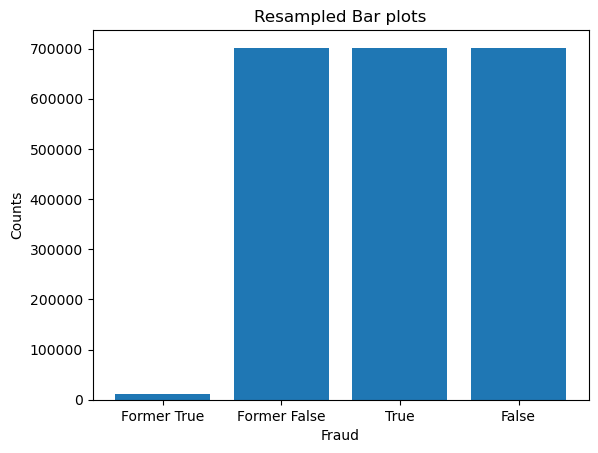

In [96]:
values = [len(DataCut[DataCut["isFraud"] == True]), len(DataCut[DataCut["isFraud"] == False]), 
          len(y_resampled[y_resampled == True]), len(y_resampled[y_resampled == False])]
labels = ["Former True", 'Former False','True', 'False']

# Create a bar chart
fig, ax = plt.subplots()

ax.bar(labels, values)

# Customize the chart
ax.set_xlabel('Fraud')
ax.set_ylabel('Counts')
ax.set_title('Resampled Bar plots')
# fig.savefig("../outputs/outputFinal.png", bbox_inches = "tight")
# Display the chart
plt.show()